In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))
from sklearn import metrics, model_selection

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [6]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.describe()
test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train = train.loc[train['y']!=train['y'].max()]

In [8]:
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

In [9]:
X = train.drop(['ID', 'y'], axis=1)
y = train['y']

In [10]:
feature_labels = X.columns
forest = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
forest.fit(X, y)    # Fits the Random Forest Regressor to the entire data set.
importances = forest.feature_importances_  # Sets importances equal to the feature importances of the model
indices = np.argsort(importances)[::-1]
order_features = []
order_importances = []
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feature_labels[indices[f]], importances[indices[f]]))
    order_features.append(feature_labels[f])
    order_importances.append(importances[indices[f]])

 1) X314                           0.393906
 2) X315                           0.075398
 3) X5                             0.065658
 4) X6                             0.034147
 5) X8                             0.031934
 6) X118                           0.028506
 7) X119                           0.027816
 8) X263                           0.018507
 9) X3                             0.016027
10) X136                           0.013498
11) X0                             0.012337
12) X1                             0.010123
13) X127                           0.008401
14) X29                            0.007948
15) X232                           0.007873
16) X279                           0.007530
17) X2                             0.007009
18) X54                            0.005940
19) X47                            0.005237
20) X189                           0.005119
21) X76                            0.004751
22) X46                            0.003595
23) X27                         

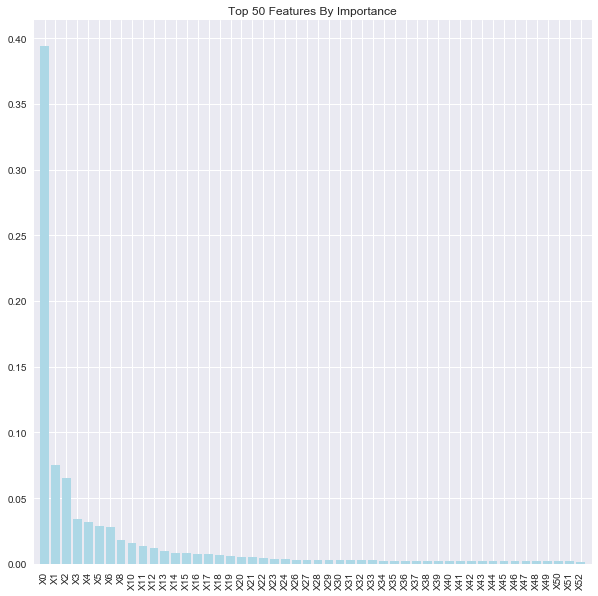

In [11]:
plt.figure(figsize=(10,10))
top_50_importances = order_importances[:50] #This will give us the top 50 features by importance
plt.title('Top 50 Features By Importance')
plt.bar(range(X.shape[1]-326), top_50_importances, color='lightblue', align='center')
plt.xticks(range(X.shape[1]-326), order_features[:50], rotation=90)
plt.xlim([-1, X.shape[1]-326])
plt.show()

In [12]:
test = test.drop(order_features[250:], axis=1)
train = train.drop(order_features[250:], axis=1) # Modify train to only take in the top 100 features and the target column y

In [13]:
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
import xgboost as xgb
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.utils import check_array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.utils import check_array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score



class StackingEstimator(BaseEstimator, TransformerMixin):
    
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None, **fit_params):
        self.estimator.fit(X, y, **fit_params)
        return self
    def transform(self, X):
        X = check_array(X)
        X_transformed = np.copy(X)
        # add class probabilities as a synthetic feature
        if issubclass(self.estimator.__class__, ClassifierMixin) and hasattr(self.estimator, 'predict_proba'):
            X_transformed = np.hstack((self.estimator.predict_proba(X), X))

        # add class prodiction as a synthetic feature
        X_transformed = np.hstack((np.reshape(self.estimator.predict(X), (-1, 1)), X_transformed))

        return X_transformed

In [15]:
test.info()
train.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 251 entries, ID to X257
dtypes: int64(251)
memory usage: 8.1 MB


<bound method DataFrame.info of         ID       y  X0  X1  X2  X3  X4  X5  X6  X8  ...   X248  X249  X250  \
0        0  130.81  37  23  20   0   3  27   9  14  ...      0     0     0   
1        6   88.53  37  21  22   4   3  31  11  14  ...      0     0     1   
2        7   76.26  24  24  38   2   3  30   9  23  ...      0     0     1   
3        9   80.62  24  21  38   5   3  30  11   4  ...      0     0     1   
4       13   78.02  24  23  38   5   3  14   3  13  ...      0     0     1   
5       18   92.93  46   3  29   2   3  13   7  18  ...      0     0     1   
6       24  128.76  11  19  29   5   3  12   7  18  ...      0     0     1   
7       25   91.91  41  13  19   5   3  12   9   0  ...      0     0     0   
8       27  108.67  49  20  19   4   3  12   8   7  ...      0     0     0   
9       30  126.99  36   3  17   2   3  12   0   4  ...      0     0     1   
10      31  102.09  34  19  42   5   3  12   7  15  ...      0     0     1   
11      32   98.12  11  19  29  

In [16]:
n_comp = 12

# tSVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
tsvd_results_train = tsvd.fit_transform(train.drop(["y"], axis=1))
tsvd_results_test = tsvd.transform(test)
test.info()

# PCA
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(train.drop(["y"], axis=1))
pca2_results_test = pca.transform(test)

# ICA
ica = FastICA(n_components=n_comp, random_state=420)
ica2_results_train = ica.fit_transform(train.drop(["y"], axis=1))
ica2_results_test = ica.transform(test)

# GRP
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_results_train = grp.fit_transform(train.drop(["y"], axis=1))
grp_results_test = grp.transform(test)

# SRP
srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
srp_results_train = srp.fit_transform(train.drop(["y"], axis=1))
srp_results_test = srp.transform(test)

#save columns list before adding the decomposition components

usable_columns = list(set(train.columns) - set(['y']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 251 entries, ID to X257
dtypes: int64(251)
memory usage: 8.1 MB


/Users/amcfarlin/Projects/gunnars_data_championships/venv/lib/python3.4/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [17]:
for i in range(1, n_comp + 1):
    train['pca_' + str(i)] = pca2_results_train[:, i - 1]
    test['pca_' + str(i)] = pca2_results_test[:, i - 1]

    train['ica_' + str(i)] = ica2_results_train[:, i - 1]
    test['ica_' + str(i)] = ica2_results_test[:, i - 1]

    train['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
    test['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]

    train['grp_' + str(i)] = grp_results_train[:, i - 1]
    test['grp_' + str(i)] = grp_results_test[:, i - 1]

    train['srp_' + str(i)] = srp_results_train[:, i - 1]
    test['srp_' + str(i)] = srp_results_test[:, i - 1]

In [18]:
y_train = train['y'].values
y_mean = np.mean(y_train)
id_test = test['ID'].values
#finaltrainset and finaltestset are data to be used only the stacked model (does not contain PCA, SVD... arrays) 
finaltrainset = train[usable_columns].values
finaltestset = test[usable_columns].values

In [19]:
'''Train the xgb model then predict the test data'''

xgb_params = {
    'n_trees': 520, 
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}


dtrain = xgb.DMatrix(train.drop('y', axis=1), y_train)
dtest = xgb.DMatrix(test)

num_boost_rounds = 1250
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
y_pred = model.predict(dtest)

In [20]:
'''Train the stacked models then predict the test data'''

stacked_pipeline = make_pipeline(
    StackingEstimator(estimator=ElasticNetCV(normalize=True)),
    StackingEstimator(estimator=GradientBoostingRegressor(learning_rate=0.001, loss="huber", max_depth=5, max_features=0.55, min_samples_leaf=18, min_samples_split=14, subsample=0.7, n_estimators=200)),
    ElasticNetCV()

)

stacked_pipeline.fit(finaltrainset, y_train)
results = stacked_pipeline.predict(finaltestset)

'''R2 Score on the entire Train data when averaging'''

print('R2 score on train data:')
print(r2_score(y_train,stacked_pipeline.predict(finaltrainset)*0.2855 + model.predict(dtrain)*0.7145))



'''Average the predictions test data of both models then save it on a csv file'''

print('Cross Validation')
print('................')

n_folds = 5
kf = model_selection.StratifiedKFold(n_splits=n_folds, random_state=1, shuffle=True)

X = train.drop('y', axis=1).values
y = train['y'].values


fold = 0
for train_index, test_index in kf.split(X, y):
    fold += 1
    
    X_training, X_valid = X[train_index], X[test_index]
    y_training, y_valid = y[train_index], y[test_index]
    
    finaltrainset = train[usable_columns].values
    final_train, final_valid = finaltrainset[train_index], finaltrainset[test_index]
    
    print("Fold", fold, X_training.shape, X_valid.shape)
    
    print('Fitting XGBoost for Fold {}'.format(fold))
    dtrain = xgb.DMatrix(X_training, y_training)
    dtest = xgb.DMatrix(X_valid)
    model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
    
    print('Fitting stacked pipeline for Fold {}'.format(fold))
    stacked_pipeline.fit(final_train, y_training)
    
    print(r2_score(y_valid,stacked_pipeline.predict(final_valid)*0.2855 + model.predict(dtest)*0.7145))

    
sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = y_pred*0.75 + results*0.25
sub.to_csv('stacked-models.csv', index=False)

R2 score on train data:
0.663017078306
Cross Validation
................


/Users/amcfarlin/Projects/gunnars_data_championships/venv/lib/python3.4/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Fold 1 (3346, 311) (862, 311)
Fitting XGBoost for Fold 1
Fitting stacked pipeline for Fold 1
0.566511504938
Fold 2 (3360, 311) (848, 311)
Fitting XGBoost for Fold 2
Fitting stacked pipeline for Fold 2
0.592925612287
Fold 3 (3383, 311) (825, 311)
Fitting XGBoost for Fold 3
Fitting stacked pipeline for Fold 3
0.559456020202
Fold 4 (3390, 311) (818, 311)
Fitting XGBoost for Fold 4
Fitting stacked pipeline for Fold 4
0.602125710581
Fold 5 (3353, 311) (855, 311)
Fitting XGBoost for Fold 5
Fitting stacked pipeline for Fold 5
0.601508910956
